In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
data=pd.read_csv('owid-covid-data.csv')
data


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169478,ZWE,Africa,Zimbabwe,2022-03-14,242909.0,394.0,457.000,5416.0,2.0,2.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
169479,ZWE,Africa,Zimbabwe,2022-03-15,242909.0,0.0,366.571,5416.0,0.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
169480,ZWE,Africa,Zimbabwe,2022-03-16,243650.0,741.0,472.429,5418.0,2.0,2.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
169481,ZWE,Africa,Zimbabwe,2022-03-17,243650.0,0.0,300.286,5418.0,0.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
dataVaccination=pd.read_csv('covid-hospitalizations.csv')
dataVaccination

,entity,iso_code,date,indicator,value
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.390
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.502
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
...,...,...,...,...,...
131035,United States,USA,2022-03-16,Daily ICU occupancy per million,10.363
131036,United States,USA,2022-03-16,Daily hospital occupancy,17911.000
131037,United States,USA,2022-03-16,Daily hospital occupancy per million,53.801
131038,United States,USA,2022-03-16,Weekly new hospital admissions,16707.000


In [6]:
dataLinear=dataVaccination[dataVaccination['indicator']=='Daily hospital occupancy'].groupby(['date'])['value'].sum()

In [134]:
totalDeathsTurkey=data[data['location']=='Turkey'].groupby(['date'])['total_deaths'].sum()
totalDeathsTurkey

date
2020-03-11        0.0
2020-03-12        0.0
2020-03-13        0.0
2020-03-14        0.0
2020-03-15        0.0
               ...   
2022-03-14    96620.0
2022-03-15    96735.0
2022-03-16    96853.0
2022-03-17    96954.0
2022-03-18    97077.0
Name: total_deaths, Length: 738, dtype: float64

In [135]:
first_n_column  = totalDeathsTurkey.head(10)
first_n_column

date
2020-03-11    0.0
2020-03-12    0.0
2020-03-13    0.0
2020-03-14    0.0
2020-03-15    0.0
2020-03-16    0.0
2020-03-17    1.0
2020-03-18    1.0
2020-03-19    3.0
2020-03-20    4.0
Name: total_deaths, dtype: float64

In [136]:
last_n_column=totalDeathsTurkey[-11:-1]
last_n_column

date
2022-03-08    95811.0
2022-03-09    95954.0
2022-03-10    96094.0
2022-03-11    96217.0
2022-03-12    96349.0
2022-03-13    96487.0
2022-03-14    96620.0
2022-03-15    96735.0
2022-03-16    96853.0
2022-03-17    96954.0
Name: total_deaths, dtype: float64

In [7]:
x=np.arange(len(dataLinear))
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
y=dataLinear.values
y

array([1.00000e+00, 1.00000e+00, 1.00000e+00, 1.27000e+02, 1.51000e+02,
       1.65000e+02, 3.07000e+02, 4.21000e+02, 5.19000e+02, 8.02000e+02,
       9.56000e+02, 1.31800e+03, 1.71200e+03, 2.24000e+03, 2.97600e+03,
       3.38500e+03, 4.41000e+03, 5.32200e+03, 6.28400e+03, 7.33500e+03,
       8.40000e+03, 9.48600e+03, 1.07800e+04, 1.26590e+04, 1.45290e+04,
       1.70780e+04, 2.20780e+04, 2.54880e+04, 2.77820e+04, 3.10210e+04,
       3.50820e+04, 3.87350e+04, 4.36120e+04, 4.82960e+04, 5.27900e+04,
       6.47640e+04, 6.93370e+04, 7.40190e+04, 8.04740e+04, 8.44720e+04,
       8.95680e+04, 9.39020e+04, 9.73410e+04, 1.00564e+05, 1.02522e+05,
       1.05305e+05, 1.05938e+05, 1.09234e+05, 1.07394e+05, 1.08029e+05,
       1.08252e+05, 1.09168e+05, 1.11862e+05, 1.09539e+05, 1.10637e+05,
       1.08756e+05, 1.06517e+05, 1.02056e+05, 1.04462e+05, 1.05312e+05,
       1.03623e+05, 1.02059e+05, 9.89220e+04, 9.58790e+04, 9.36640e+04,
       9.32770e+04, 9.18980e+04, 9.53290e+04, 8.76510e+04, 8.518

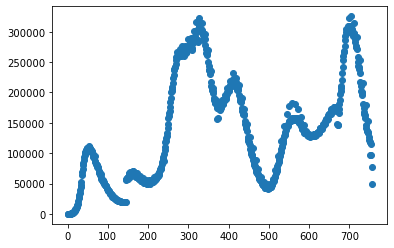

In [10]:
plt.scatter(x,y)
plt.savefig("scatter grafig.png")
plt.show()

In [13]:
x=x.reshape(-1,1)
x



array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

# LinearRegression

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x,y)
LinearRegression()

LinearRegression()

In [15]:
yp=regressor.predict(x)
yp

array([ 68973.02301126,  69157.34021849,  69341.65742572,  69525.97463296,
        69710.29184019,  69894.60904742,  70078.92625465,  70263.24346188,
        70447.56066911,  70631.87787635,  70816.19508358,  71000.51229081,
        71184.82949804,  71369.14670527,  71553.4639125 ,  71737.78111973,
        71922.09832697,  72106.4155342 ,  72290.73274143,  72475.04994866,
        72659.36715589,  72843.68436312,  73028.00157036,  73212.31877759,
        73396.63598482,  73580.95319205,  73765.27039928,  73949.58760651,
        74133.90481374,  74318.22202098,  74502.53922821,  74686.85643544,
        74871.17364267,  75055.4908499 ,  75239.80805713,  75424.12526437,
        75608.4424716 ,  75792.75967883,  75977.07688606,  76161.39409329,
        76345.71130052,  76530.02850775,  76714.34571499,  76898.66292222,
        77082.98012945,  77267.29733668,  77451.61454391,  77635.93175114,
        77820.24895838,  78004.56616561,  78188.88337284,  78373.20058007,
        78557.5177873 ,  

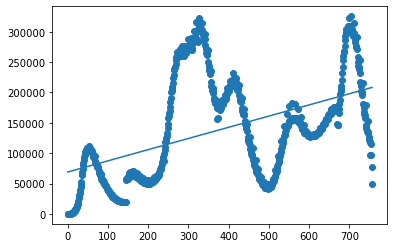

In [16]:
plt.scatter(x,y)
plt.plot(x,yp)
plt.savefig("Linear Regression.png")
plt.show()

In [40]:
regressor.score(x,y)*100

95.82406490003486

In [41]:
regressor.intercept_


-13976.077208268682

In [42]:
regressor.coef_

array([137.70515486])

In [43]:
regressor.predict([[315]])

array([29401.0465727])

# RandomForestRegression

In [17]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=400)
reg.fit(x,y)



RandomForestRegressor(n_estimators=400)

In [18]:
reg.score(x,y)*100

99.93514126543033

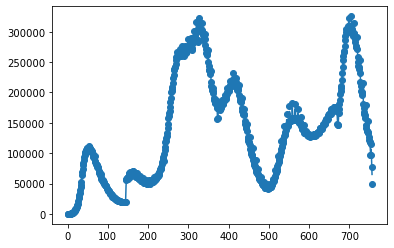

In [19]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x))
plt.show()

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

class NYTCovid:
    def __init__(self):
        from datetime import date
        self.statedf = None
        self.countydf = None
        self._stateupdated = False
        self._countyupdated = False
        self._processed = False
        self._today = date.today()
    
    def today(self):
        print("Today is:",self._today)
    def barh_State(self,filterValue="continent"):
        
        filter=str(filterValue)
        
        df_countries_cases=pd.read_csv('owid-covid-data.csv')
        df= df_countries_cases[df_countries_cases["continent"]==filter]
       
        
        
        print(df)
        dates = df['date']
        cases = df['total_cases']
        deaths = df['total_deaths']
        newcases = df['new_cases']
        newdeaths = df['new_deaths']
        print(dates)

       
        # getting country wise data
       
        SubCases =  cases.sum().astype("int64")
        NewSubCases = newcases.sum().astype("int64")
        SubDeaths = deaths.sum().astype("int64")
        NewSubDeaths = newdeaths.sum().astype("int64")
        print(NewSubDeaths)
        data = {
          "Total Cases":[SubCases],
          "New Cases": [NewSubCases],
          "Total Deaths":[SubDeaths],
          "New Deaths":[NewSubDeaths]
        }

        dfValue = pd.DataFrame(data)
        print(dfValue)
        
      
        
        courses = list(data.keys())
        values = list(data.values())
        print(values)
        
    
        
        f = plt.figure(figsize=(14,4))
        f.add_subplot(111)
       
        
        plt.barh(courses[0],values[0])
        #plt.pie(values, labels=courses, autopct='%0.f%%', shadow=True, startangle=90)
        plt.tick_params(size=5,labelsize = 13)
        plt.xlabel("Total Cases",fontsize=18)
        plt.title("Top 10 Countries (Total Cases)",fontsize=20)
        plt.grid(alpha=0.3)
        print()
        
        plt.barh(courses[1],values[1])
        plt.tick_params(size=5,labelsize = 13)
        plt.xlabel("New Cases",fontsize=18)
        plt.title("Top 10 Countries (New Cases)",fontsize=20)
        plt.grid(alpha=0.3)
        print()
        
        plt.barh(courses[2],values[2])
        plt.tick_params(size=5,labelsize = 13)
        plt.xlabel("Total Deaths",fontsize=18)
        plt.title("Top 10 Countries (Total Cases)",fontsize=20)
        plt.grid(alpha=0.3)
        print()
        
        plt.barh(courses[3],values[3])
        plt.tick_params(size=5,labelsize = 13)
        plt.xlabel("Statistic",fontsize=18)
        plt.title("Statistic ",fontsize=20)
        plt.savefig('Continent Statistic.png')
        plt.grid(alpha=0.3)
    
        
    
    
        
    def plot_state(self,
                   state='Canada',
                   last_30_days=False):
            
        
        s = str(state)
            
        datadf=pd.read_csv('owid-covid-data.csv')
        self.statedf=datadf[datadf['location']==s]
        df=self.statedf

      

        
        dates = df['date']
        cases = df['total_cases']
        deaths = df['total_deaths']
        newcases = df['new_cases']
        newdeaths = df['new_deaths']
        
        if last_30_days:
            dates = df['date'][-31:-1]
            cases = df['total_cases'][-31:-1]
            deaths = df['total_deaths'][-31:-1]
            newcases = df['new_cases'][-31:-1]
            newdeaths = df['new_deaths'][-31:-1]
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("Cumulative cases in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("Cumulative cases in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=cases,color='blue',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
        print()
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("Cumulative deaths in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("Cumulative deaths in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=deaths,color='red',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
        print()
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("New cases in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("New cases in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=newcases,color='yellow',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
        print()
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("New deaths in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("New deaths in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=newdeaths,color='orange',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
   
        
        

      iso_code      continent location        date  total_cases  new_cases  \
27617      CAN  North America   Canada  2020-01-23          2.0        2.0   
27618      CAN  North America   Canada  2020-01-24          3.0        1.0   
27619      CAN  North America   Canada  2020-01-25          3.0        0.0   
27620      CAN  North America   Canada  2020-01-26          3.0        0.0   
27621      CAN  North America   Canada  2020-01-27          3.0        0.0   
...        ...            ...      ...         ...          ...        ...   
28398      CAN  North America   Canada  2022-03-14    3377844.0     4522.0   
28399      CAN  North America   Canada  2022-03-15    3386875.0     9031.0   
28400      CAN  North America   Canada  2022-03-16    3392164.0     5289.0   
28401      CAN  North America   Canada  2022-03-17    3396364.0     4200.0   
28402      CAN  North America   Canada  2022-03-18    3399704.0     3340.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths

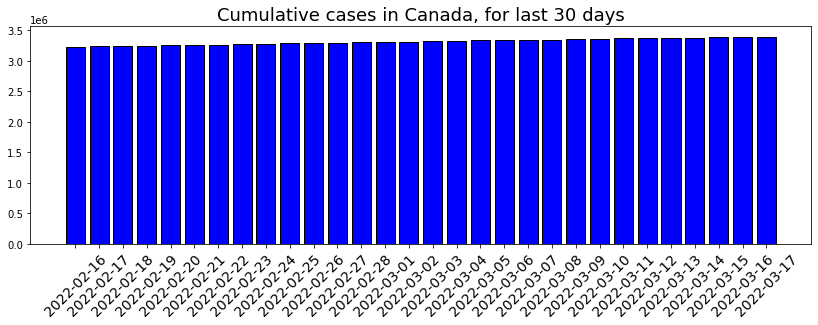

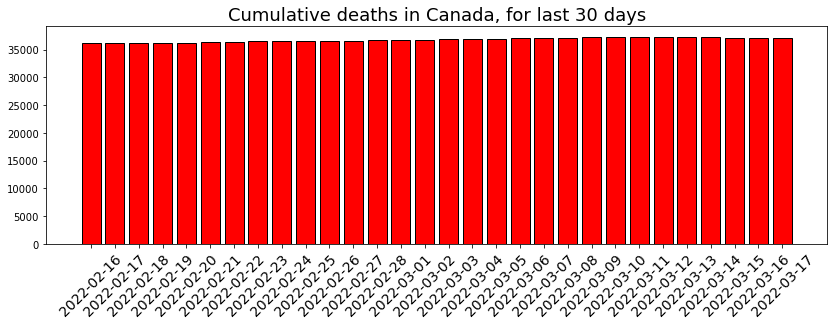

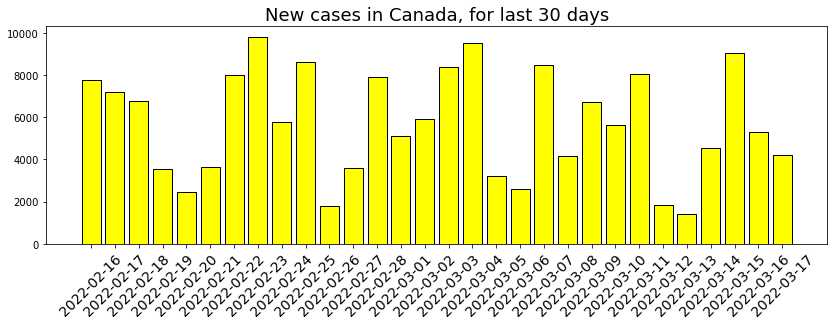

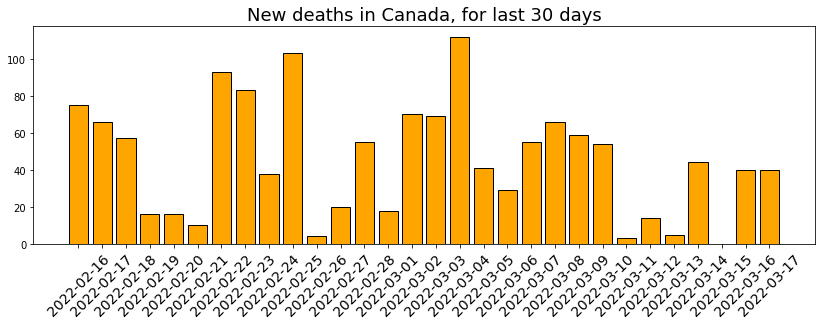

In [31]:
n = NYTCovid()
n.plot_state('Canada',last_30_days=True)

       iso_code      continent       location        date  total_cases  \
4501        AIA  North America       Anguilla  2020-03-28          2.0   
4502        AIA  North America       Anguilla  2020-03-29          2.0   
4503        AIA  North America       Anguilla  2020-03-30          2.0   
4504        AIA  North America       Anguilla  2020-03-31          2.0   
4505        AIA  North America       Anguilla  2020-04-01          2.0   
...         ...            ...            ...         ...          ...   
160992      USA  North America  United States  2022-03-14   79560288.0   
160993      USA  North America  United States  2022-03-15   79585838.0   
160994      USA  North America  United States  2022-03-16   79630853.0   
160995      USA  North America  United States  2022-03-17   79683737.0   
160996      USA  North America  United States  2022-03-18   79717247.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
4501          2.0                 NaN       

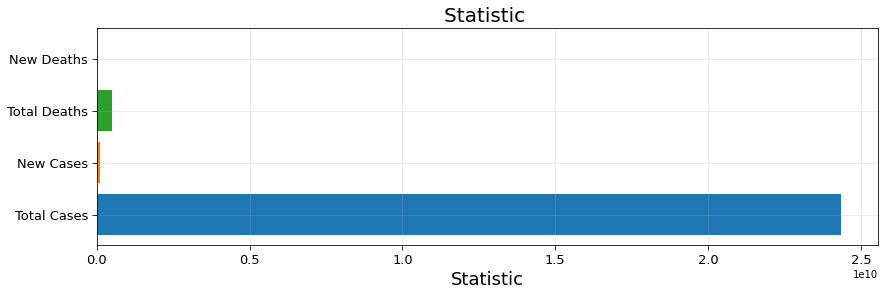

In [31]:
n = NYTCovid()
n.barh_State("North America")

In [168]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from warnings import filterwarnings
filterwarnings('ignore')

dataKnn=pd.read_csv('covid-hospitalizations.csv')
df = dataKnn.copy()
df.isnull().sum().sum()
df['value'].isnull().sum()





0

# KNN


In [106]:
y = df['value']
y=y.astype("int64")
X = df.drop(['entity','indicator','iso_code','date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [107]:
import numpy as np
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [108]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [109]:
y_pred = knn_model.predict(X_test)

In [110]:
accuracy_score(y_test, y_pred)

0.8899318274318274

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1448
           1       1.00      1.00      1.00       871
           2       1.00      1.00      1.00       721
           3       1.00      1.00      1.00       758
           4       1.00      1.00      1.00       589
           5       1.00      1.00      1.00       584
           6       1.00      1.00      1.00       526
           7       1.00      1.00      1.00       502
           8       1.00      1.00      1.00       418
           9       1.00      1.00      1.00       408
          10       1.00      1.00      1.00       371
          11       1.00      1.00      1.00       405
          12       1.00      1.00      1.00       423
          13       1.00      1.00      1.00       382
          14       1.00      1.00      1.00       336
          15       1.00      1.00      1.00       358
          16       1.00      1.00      1.00       328
          17       1.00    

In [113]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_csv('owid-covid-data.csv')


In [147]:
x = data.iloc[:,4:6] # 1t for rows and second for columns
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x
x.isnull().sum()
x
x = x.replace([np.inf, -np.inf], np.nan)
x = x.dropna()
x

#x=x.astype("int",errors="ignore")

,total_cases,new_cases
0,5.0,5.0
1,5.0,0.0
2,5.0,0.0
3,5.0,0.0
4,5.0,0.0
...,...,...
169478,242909.0,394.0
169479,242909.0,0.0
169480,243650.0,741.0
169481,243650.0,0.0


In [141]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

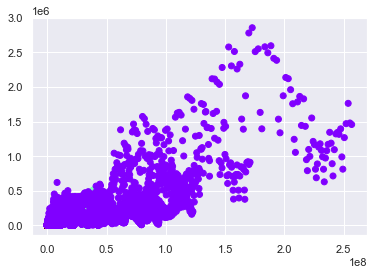

In [167]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = pd.Series(identified_clusters) 
plt.scatter(data_with_clusters['total_cases'],data_with_clusters['new_cases'],c=data_with_clusters['Clusters'],cmap='rainbow')